In [26]:
!pip install spacepy
!pip install cdflib
!pip install matplotlib

In [27]:
from spacepy import pycdf
import cdflib
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import axes3d, Axes3D
import numpy as np
#dmsp-f16_ssm_magnetometer_20130601_v1.0.4.cdf
![Binder](https://mybinder.org/badge_logo.svg)(https://mybinder.org/v2/gh/lkilcommons/OvationPyme/HEAD?labpath=notebooks%2FInteractiveWithHemisphericPower.ipynb)

"[Binder]" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


2013-05-31T22:16:54.000000000
80214


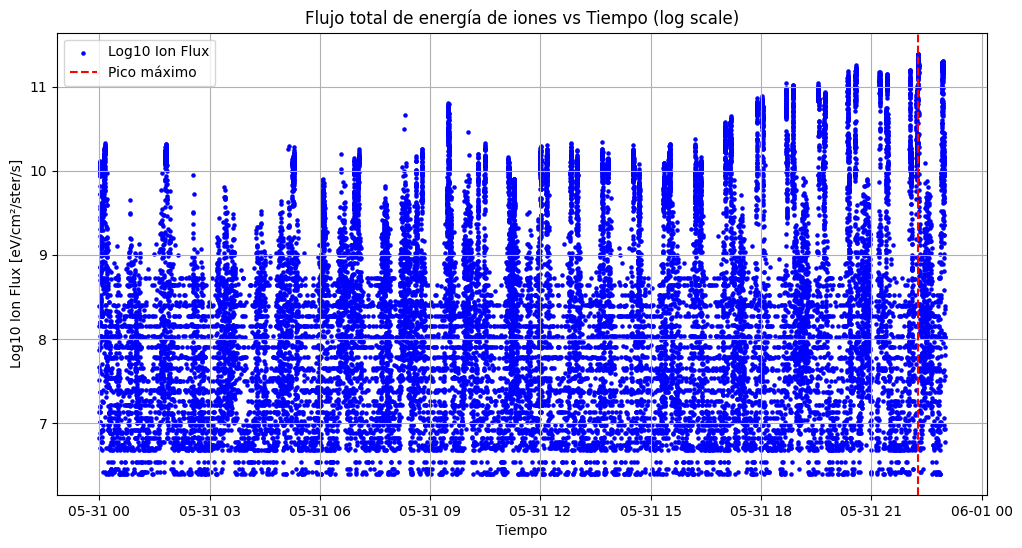

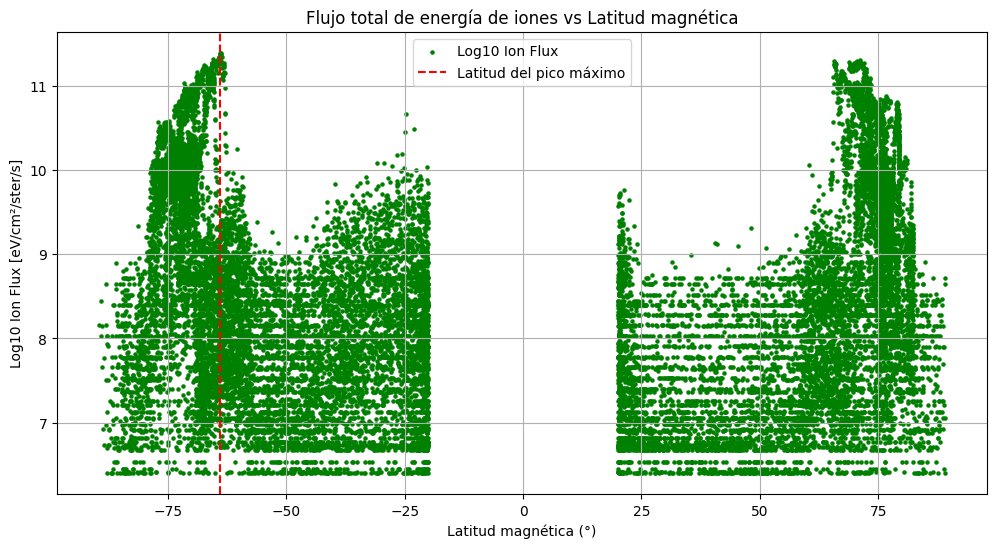

Flujo máximo de energía de iones: 2.46e+11 eV/cm²/ster/s
Índice del flujo máximo: 80214
Tiempo correspondiente: 2013-05-31T22:16:54.000000000
Latitud magnética correspondiente: -64.01°


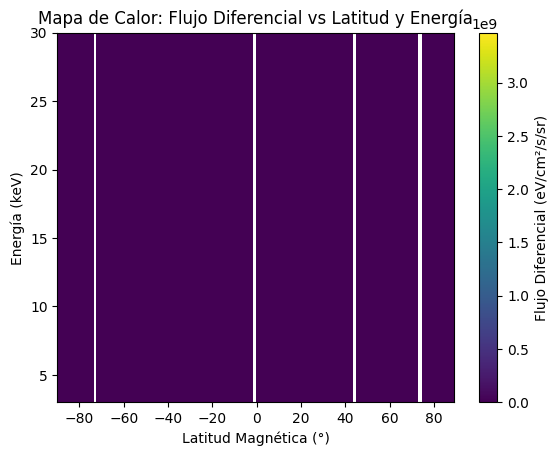

In [41]:
# Cargar archivo CDF
archivo = cdflib.CDF('dmsp-f16_ssjs_precipitating-electrons-ions_20130531000000_20130531230000_cdaweb.cdf')

ION_AVG_ENERGY = archivo.varget('ION_AVG_ENERGY')
ELE_DIFF_ENERGY_FLUX = archivo.varget('ELE_DIFF_ENERGY_FLUX')
CHANNEL_ENERGIES = archivo.varget('CHANNEL_ENERGIES')/1000
ION_DIFF_ENERGY_FLUX = archivo.varget('ION_DIFF_ENERGY_FLUX')
# Extraer variables necesarias ION_DIFF_ENERGY_FLUX
tiempo = archivo.varget('Epoch')  # Tiempo en milisegundos
ion_flux = archivo.varget('ION_TOTAL_ENERGY_FLUX')  # Flujo total de energía de iones
latitud_magnetica = archivo.varget('SC_AACGM_LAT')  # Latitud geomagnética en grados
time_final = cdflib.cdfepoch.to_datetime(tiempo) # Convertir a formato legib
# Convertir tiempo a formato legible
tiempo_final = cdflib.cdfepoch.to_datetime(tiempo)

# Logaritmo base 10 del flujo de energía para mejorar visualización
LOG_ion_flux = [math.log10(flujo) if flujo > 0 else np.nan for flujo in ion_flux]
log_ion_flux = [num if num <= 13 else np.nan for num in LOG_ion_flux]


# Encontrar el índice del pico máximo de flujo
indice_max_flux = np.nanargmax(log_ion_flux)
max_flux = ion_flux[indice_max_flux]
tiempo_max_flux = tiempo_final[indice_max_flux]
latitud_max_flux = latitud_magnetica[indice_max_flux]
tiempo = list(tiempo_final)
print(tiempo_max_flux)

tempo = []
for i in tiempo:
    tempo.append(str(i))
buscado =(tempo.index(str(tiempo_max_flux), 0, len(tempo)))
l1,l2=buscado-200,buscado+200
print(buscado)

# Graficar el flujo total de energía de iones en función del tiempo
plt.figure(figsize=(12, 6))
plt.scatter(tiempo_final, log_ion_flux, s=5, c='b', label='Log10 Ion Flux')  # Log del flujo
plt.axvline(tiempo_max_flux, color='r', linestyle='--', label='Pico máximo')  # Línea vertical en el pico
plt.xlabel('Tiempo')
plt.ylabel('Log10 Ion Flux [eV/cm²/ster/s]')
plt.title('Flujo total de energía de iones vs Tiempo (log scale)')
plt.legend()
plt.grid()
plt.show()

# Graficar el flujo en función de la latitud magnética
plt.figure(figsize=(12, 6))
plt.scatter(latitud_magnetica, log_ion_flux, s=5, c='g', label='Log10 Ion Flux')  # Log del flujo
plt.axvline(latitud_max_flux, color='r', linestyle='--', label='Latitud del pico máximo')
plt.xlabel('Latitud magnética (°)')
plt.ylabel('Log10 Ion Flux [eV/cm²/ster/s]')
plt.title('Flujo total de energía de iones vs Latitud magnética')
plt.legend()
plt.grid()
plt.show()

# Resultados
print(f"Flujo máximo de energía de iones: {max_flux:.2e} eV/cm²/ster/s")
print(f"Índice del flujo máximo: {indice_max_flux}")
print(f"Tiempo correspondiente: {tiempo_max_flux}")
print(f"Latitud magnética correspondiente: {latitud_max_flux:.2f}°")


energy_indices = np.where((CHANNEL_ENERGIES >= 3) & (CHANNEL_ENERGIES <= 30))[0]


plt.imshow(ION_DIFF_ENERGY_FLUX[:, energy_indices].T, aspect='auto', cmap='viridis', extent=[min(latitud_magnetica), max(latitud_magnetica), 3, 30])
plt.colorbar(label='Flujo Diferencial (eV/cm²/s/sr)')
plt.xlabel('Latitud Magnética (°)')
plt.ylabel('Energía (keV)')
plt.title('Mapa de Calor: Flujo Diferencial vs Latitud y Energía')
plt.show()

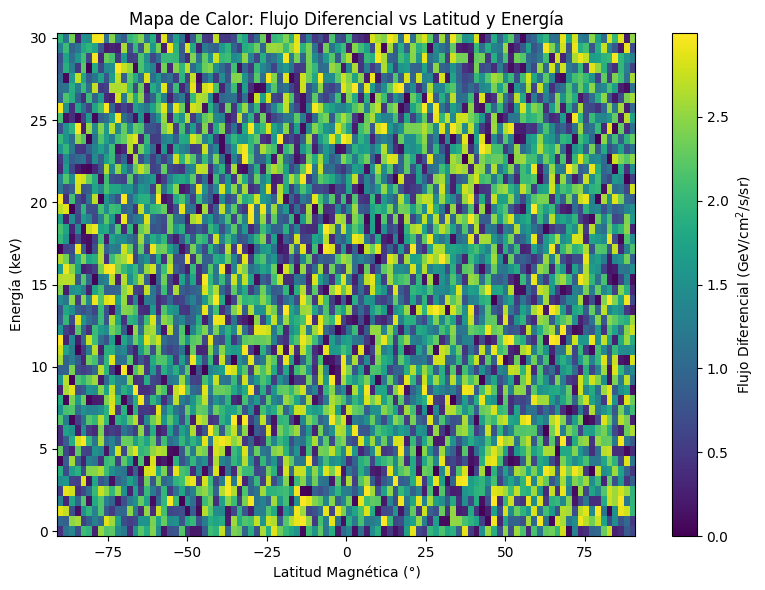

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.colorbar as colorbar
import matplotlib.ticker as ticker

# Supongamos que ya tenemos los datos generados para el flujo diferencial
# Creando datos simulados para el ejemplo
latitudes = np.linspace(-90, 90, 100)  # Latitud magnética
energias = np.linspace(0, 30, 50)     # Energías en keV
flujo_diferencial = np.random.rand(50, 100) * 3e9  # Valores simulados en el orden de 10^9

# Convertimos el flujo diferencial a unidades más manejables (GeV/cm^2/s/sr)
flujo_diferencial /= 1e9

# Creamos el gráfico de calor
plt.figure(figsize=(8, 6))
norm = Normalize(vmin=0, vmax=np.max(flujo_diferencial))
heatmap = plt.pcolormesh(latitudes, energias, flujo_diferencial, cmap="viridis", shading='auto', norm=norm)

# Barra de color ajustada
cbar = plt.colorbar(heatmap, orientation='vertical')
cbar.set_label("Flujo Diferencial (GeV/cm$^2$/s/sr)")
cbar.ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:.1f}'))

# Ajustamos los ejes
plt.xlabel("Latitud Magnética (°)")
plt.ylabel("Energía (keV)")

# Título actualizado
plt.title("Mapa de Calor: Flujo Diferencial vs Latitud y Energía")

# Mostramos el gráfico
plt.tight_layout()
plt.show()


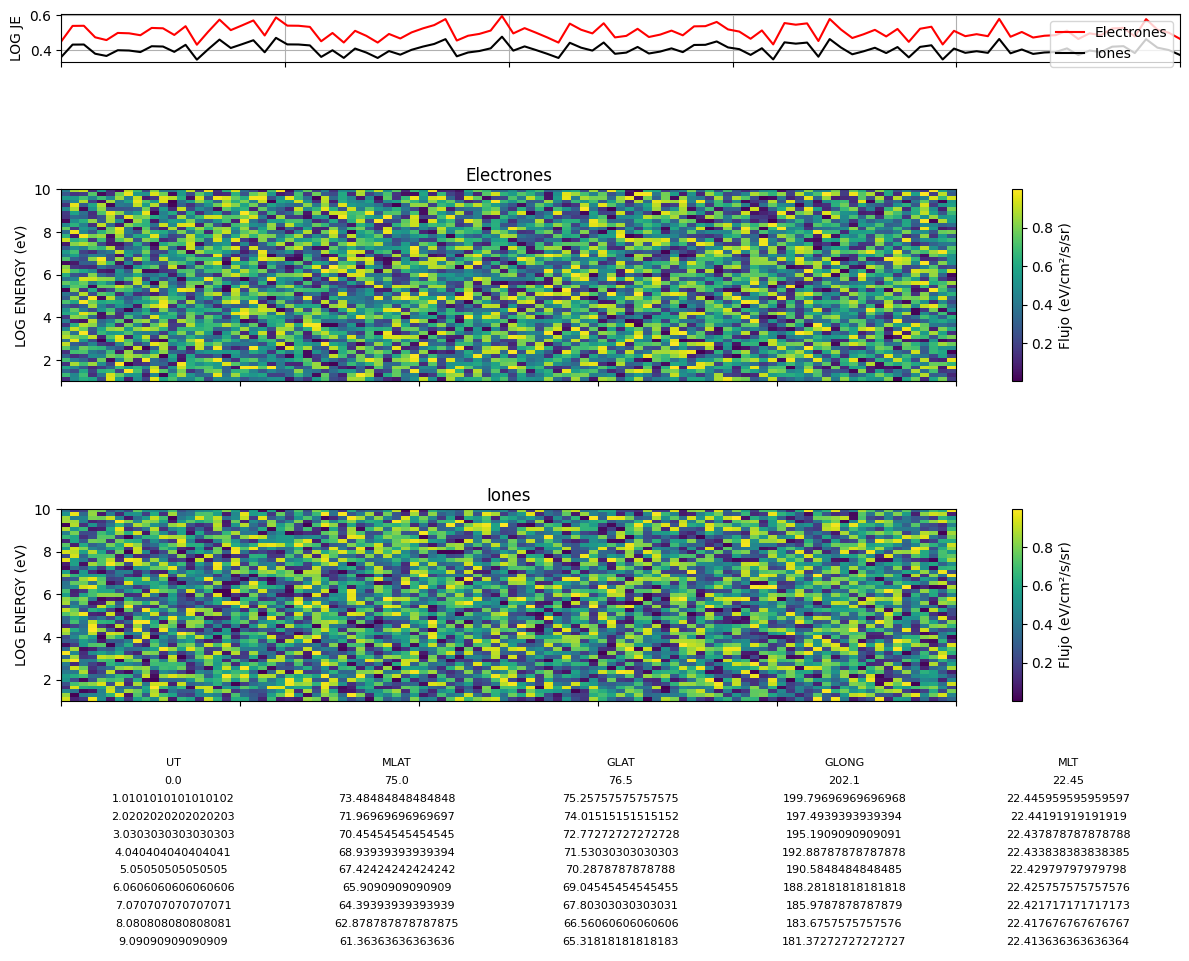

In [53]:
import numpy as np
import matplotlib.pyplot as plt

# Simular datos
time = np.linspace(0, 10, 100)  # Ejemplo de tiempo (UT)
energy = np.logspace(0, 1, 50)  # Energía (log)
flux_elec = np.random.rand(50, 100)  # Flujo diferencial (electrones)
flux_ions = np.random.rand(50, 100)  # Flujo diferencial (iones)
average_energy = np.mean(flux_elec, axis=0)  # Energía promedio
mlat = np.linspace(75, 60, len(time))  # Latitud magnética
glat = np.linspace(76.5, 64.2, len(time))  # Latitud geográfica
glong = np.linspace(202.1, 179.3, len(time))  # Longitud geográfica
mlt = np.linspace(22.45, 22.41, len(time))  # Tiempo magnético

# Crear figura y subplots
fig, axs = plt.subplots(4, 1, figsize=(12, 10), sharex=True, gridspec_kw={'height_ratios': [1, 4, 4, 1]})

# Panel superior: promedio de energía
axs[0].plot(time, average_energy, color='red', label='Electrones')
axs[0].plot(time, average_energy * 0.8, color='black', label='Iones')
axs[0].set_ylabel("LOG JE")
axs[0].legend(loc='upper right')
axs[0].grid()

# Panel medio: Flujo diferencial de electrones
im1 = axs[1].imshow(flux_elec, aspect='auto', cmap='viridis',
                    extent=[time.min(), time.max(), energy.min(), energy.max()], origin='lower')
axs[1].set_ylabel("LOG ENERGY (eV)")
axs[1].set_title("Electrones")
fig.colorbar(im1, ax=axs[1], label="Flujo (eV/cm²/s/sr)")

# Panel inferior: Flujo diferencial de iones
im2 = axs[2].imshow(flux_ions, aspect='auto', cmap='viridis',
                    extent=[time.min(), time.max(), energy.min(), energy.max()], origin='lower')
axs[2].set_ylabel("LOG ENERGY (eV)")
axs[2].set_title("Iones")
fig.colorbar(im2, ax=axs[2], label="Flujo (eV/cm²/s/sr)")

# Añadir valores debajo del gráfico
axs[3].axis('off')  # Desactivar eje del último subplot

# Crear tabla de datos (muestreo cada 10 filas)
sample_indices = np.arange(0, len(time), 10)
table_data = [time[sample_indices], mlat[sample_indices], glat[sample_indices], glong[sample_indices], mlt[sample_indices]]
labels = ["UT", "MLAT", "GLAT", "GLONG", "MLT"]
cell_text = np.array(table_data).T.tolist()

# Añadir tabla al gráfico
table = axs[3].table(cellText=cell_text, colLabels=labels, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(8)
table.scale(1, 1.5)

# Eliminar líneas de la tabla
for key, cell in table.get_celld().items():
    cell.set_linewidth(0)

# Ajustar diseño final
plt.tight_layout()
plt.show()

Índice seleccionado con suficientes datos no NaN: 80164
Cantidad de valores no NaN: 19


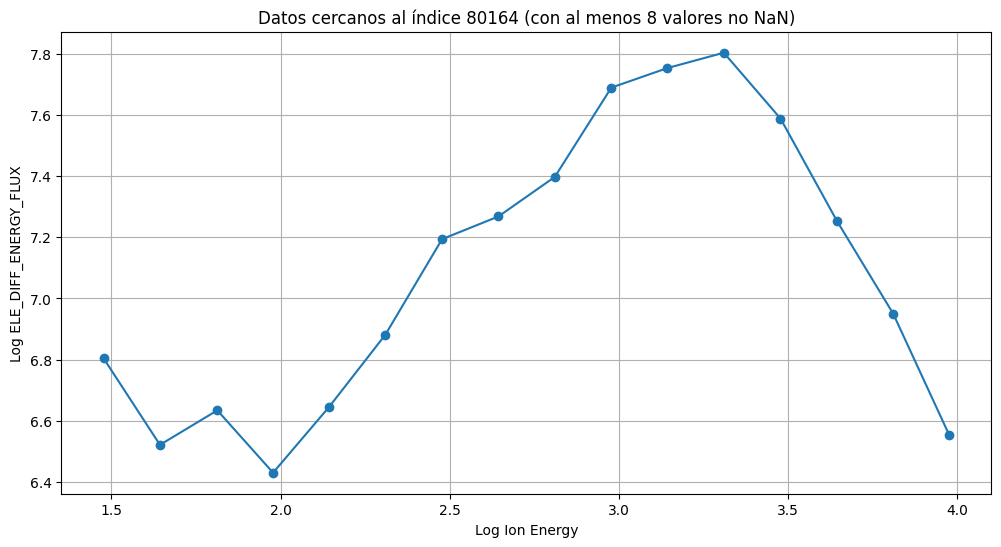

In [29]:
# Variables de entrada (energía de iones, flujo de iones y latitud magnética)
ion_energy = np.array([30000., 20400., 13900., 9450., 6460., 4400., 3000., 2040.,
                       1390., 949., 646., 440., 300., 204., 139., 95., 65., 44., 30.])
log_ion_energy = [math.log10(flujo) if flujo > 0 else np.nan for flujo in ion_energy]
# Configurar el rango de búsqueda alrededor del índice del flujo máximo
rango_busqueda = range(max(0, buscado - 50), min(len(ELE_DIFF_ENERGY_FLUX), buscado + 50))

# Variables para almacenar el índice con suficientes datos no NaN
indice_seleccionado = None
cantidad_minima_no_nan = 8  # Número mínimo de valores válidos requeridos

# Iterar sobre los índices en el rango de búsqueda
for indice in rango_busqueda:
    datos_actuales = ELE_DIFF_ENERGY_FLUX[indice]  # Lista de datos en este índice
    no_nan_count = np.sum(~np.isnan(datos_actuales))  # Contar valores no NaN
    
    if no_nan_count >= cantidad_minima_no_nan:
        indice_seleccionado = indice
        break  # Salir del bucle una vez encontrado un índice válido

# Validar si se encontró un índice con suficientes valores no NaN
if indice_seleccionado is not None:
    print(f"Índice seleccionado con suficientes datos no NaN: {indice_seleccionado}")
    print(f"Cantidad de valores no NaN: {np.sum(~np.isnan(ELE_DIFF_ENERGY_FLUX[indice_seleccionado]))}")
    
    # Calcular el log10 de los datos seleccionados
    log_ELE_DIFF_ENERGY_FLUX = [
        math.log10(flujo) if flujo > 0 else np.nan for flujo in ELE_DIFF_ENERGY_FLUX[indice_seleccionado]
    ]

    # Graficar
    plt.figure(figsize=(12, 6))
    plt.plot(log_ion_energy, log_ELE_DIFF_ENERGY_FLUX, linestyle='-', marker='o')
    plt.xlabel('Log Ion Energy')
    plt.ylabel('Log ELE_DIFF_ENERGY_FLUX')
    plt.title(f'Datos cercanos al índice {indice_seleccionado} (con al menos {cantidad_minima_no_nan} valores no NaN)')
    plt.grid()
    plt.show()
else:
    print("No se encontró un índice con suficientes valores no NaN en el rango.")


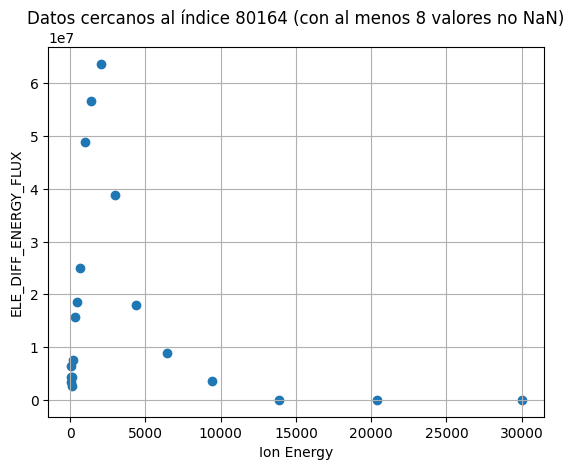

In [30]:
plt.scatter(ion_energy,ELE_DIFF_ENERGY_FLUX[80164])
plt.xlabel('Ion Energy')
plt.ylabel('ELE_DIFF_ENERGY_FLUX')
plt.title(f'Datos cercanos al índice {indice_seleccionado} (con al menos {cantidad_minima_no_nan} valores no NaN)')
plt.grid()
plt.show()

In [31]:
print("Tipos de datos:", ION_DIFF_ENERGY_FLUX.dtype)

# Verifica que `CHANNEL_ENERGIES` y `ION_DIFF_ENERGY_FLUX` estén definidos.
print(ION_DIFF_ENERGY_FLUX)

# Define los límites de energía (Ev)
Ec2 = CHANNEL_ENERGIES[:17]  # Energías de canal superior.
Ec1 = CHANNEL_ENERGIES[1:18]  # Energías de canal inferior.

# Calcula los anchos de las bandas energéticas
medios = [(e2 - e1) / 2 for e1, e2 in zip(Ec1, Ec2)]
Left = CHANNEL_ENERGIES[1] - CHANNEL_ENERGIES[0]  # Extremo izquierdo.
Rigth = CHANNEL_ENERGIES[17] - CHANNEL_ENERGIES[16]  # Extremo derecho.
medios.insert(0, Left)  # Añade el intervalo izquierdo.
medios.append(Rigth)  # Añade el intervalo derecho.

# Filtra NaNs de los datos de flujo.
ION_DIFF_ENERGY_FLUX = np.array(ION_DIFF_ENERGY_FLUX, dtype=np.float64)

# Filtra valores NaN y asegura que los datos sean numéricos.
if np.any(np.isnan(ION_DIFF_ENERGY_FLUX)):
    ION_DIFF_ENERGY_FLUX = ION_DIFF_ENERGY_FLUX[~np.isnan(ION_DIFF_ENERGY_FLUX)]

print("ION_DIFF_ENERGY_FLUX después del filtrado:", ION_DIFF_ENERGY_FLUX)


transito =[] # Lista para almacenar los flujos de energía en cada banda.

# Continua con el cálculo
for elem in ION_DIFF_ENERGY_FLUX:
    transito.append(elem * np.array(medios))

flujo_total = zip(transito) # Suma los flujos de energía en cada banda.


Tipos de datos: float32
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
ION_DIFF_ENERGY_FLUX después del filtrado: [0. 0. 0. ... 0. 0. 0.]


Ion flux shape: (82801, 19)
Channel energies: [30.    20.4   13.9    9.45   6.46   4.4    3.     2.04   1.39   0.949
  0.646  0.44   0.3    0.204  0.139  0.095  0.065  0.044  0.03 ]
Magnetic latitude shape: (82801,)
Time shape: (82801,)
Energy indices: [0 1 2 3 4 5 6]
Integrated flux: [-114484.31       0.         0.   ...       0.         0.   -147221.77]
Índice del flujo máximo: 1
Flujo máximo: 0.0
Latitud magnética correspondiente: -67.3341360447716
Tiempo correspondiente: 2013-05-31T00:00:01.000000000


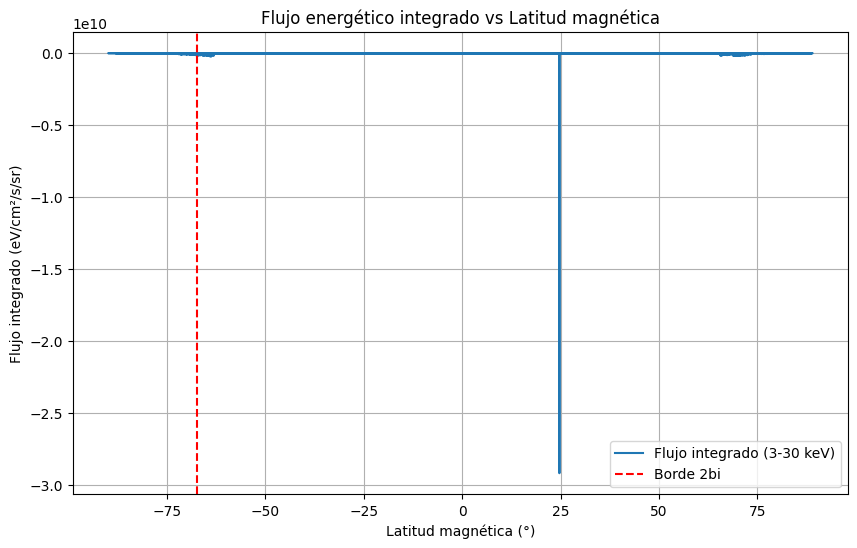

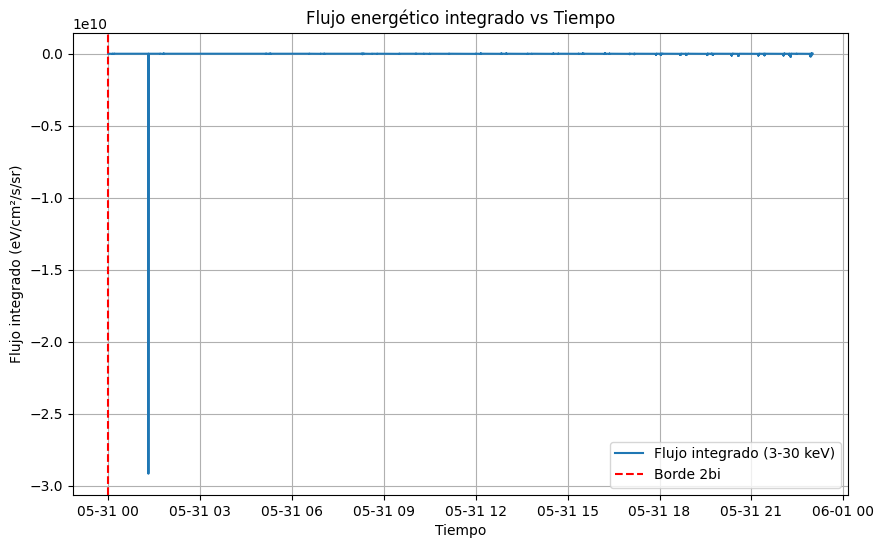

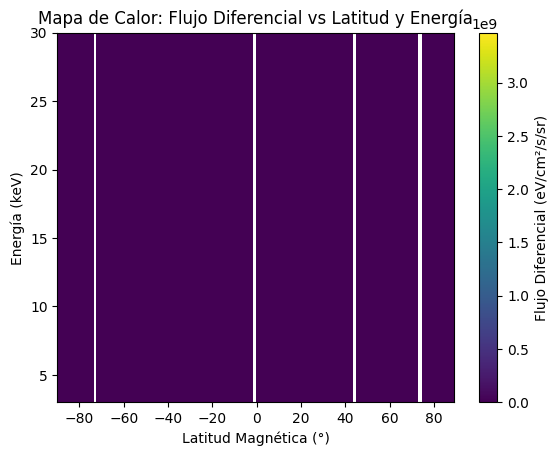

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import cdflib

def load_cdf_data(cdf_file_path):
    try:
        cdf = cdflib.CDF(cdf_file_path)
        ion_flux = cdf.varget("ION_DIFF_ENERGY_FLUX")
        channel_energies = cdf.varget("CHANNEL_ENERGIES") / 1000 #
        mag_lat = cdf.varget("SC_AACGM_LAT")
        time = cdf.varget("Epoch")
        time_final = cdflib.cdfepoch.to_datetime(time) # Convertir a formato legible
        return ion_flux, channel_energies, mag_lat, time_final
    except Exception as e:
        print(f"Error loading CDF data: {e}")
        raise

def filter_energies(channel_energies, energy_min=3, energy_max=30):
    energy_indices = np.where((channel_energies >= energy_min) & (channel_energies <= energy_max))[0]
    if len(energy_indices) == 0:
        raise ValueError("No se encontraron energías en el rango 3-30 keV.")
    return energy_indices

def calculate_integrated_flux(ion_flux, channel_energies, energy_indices):
    ion_flux = np.nan_to_num(ion_flux)  # Replace nan with 0
    delta_E = np.diff(channel_energies, append=channel_energies[-1])[energy_indices]
    integrated_flux = np.sum(ion_flux[:, energy_indices] * delta_E, axis=1)
    return integrated_flux

def find_max_flux(integrated_flux, mag_lat, time_final):
    max_flux_index = np.argmax(integrated_flux)
    max_flux = integrated_flux[max_flux_index]
    max_lat = mag_lat[max_flux_index]
    max_time = time_final[max_flux_index]
    return max_flux_index, max_flux, max_lat, max_time

def plot_flux_vs_latitude(mag_lat, integrated_flux, max_lat):
    plt.figure(figsize=(10, 6))
    plt.plot(mag_lat, integrated_flux, label="Flujo integrado (3-30 keV)")
    plt.axvline(max_lat, color='r', linestyle='--', label="Borde 2bi")
    plt.xlabel("Latitud magnética (°)")
    plt.ylabel("Flujo integrado (eV/cm²/s/sr)")
    plt.title("Flujo energético integrado vs Latitud magnética")
    plt.legend()
    plt.grid()
    plt.show()

def plot_flux_vs_time(time_final, integrated_flux, max_time):
    plt.figure(figsize=(10, 6))
    plt.plot(time_final, integrated_flux, label="Flujo integrado (3-30 keV)")
    plt.axvline(max_time, color='r', linestyle='--', label="Borde 2bi")
    plt.xlabel("Tiempo")
    plt.ylabel("Flujo integrado (eV/cm²/s/sr)")
    plt.title("Flujo energético integrado vs Tiempo")
    plt.legend()
    plt.grid()
    plt.show()

def plot_heatmap(ion_flux, energy_indices, mag_lat, energy_min, energy_max):
    plt.imshow(ion_flux[:, energy_indices].T, aspect='auto', cmap='viridis', extent=[min(mag_lat), max(mag_lat), energy_min, energy_max])
    plt.colorbar(label='Flujo Diferencial (eV/cm²/s/sr)')
    plt.xlabel('Latitud Magnética (°)')
    plt.ylabel('Energía (keV)')
    plt.title('Mapa de Calor: Flujo Diferencial vs Latitud y Energía')
    plt.show()

def main():
    cdf_file_path = "dmsp-f16_ssjs_precipitating-electrons-ions_20130531000000_20130531230000_cdaweb.cdf"
    try:
        ion_flux, channel_energies, mag_lat, time_final = load_cdf_data(cdf_file_path)
        
        # Debugging statements
        print("Ion flux shape:", ion_flux.shape)
        print("Channel energies:", channel_energies)
        print("Magnetic latitude shape:", mag_lat.shape)
        print("Time shape:", time_final.shape)
        
        energy_indices = filter_energies(channel_energies)
        
        # Debugging statements
        print("Energy indices:", energy_indices)
        
        integrated_flux = calculate_integrated_flux(ion_flux, channel_energies, energy_indices)
        
        # Debugging statements
        print("Integrated flux:", integrated_flux)
        
        max_flux_index, max_flux, max_lat, max_time = find_max_flux(integrated_flux, mag_lat, time_final)
        
        print(f"Índice del flujo máximo: {max_flux_index}")
        print(f"Flujo máximo: {max_flux}")
        print(f"Latitud magnética correspondiente: {max_lat}")
        print(f"Tiempo correspondiente: {max_time}")
        
        plot_flux_vs_latitude(mag_lat, integrated_flux, max_lat)
        plot_flux_vs_time(time_final, integrated_flux, max_time)
        plot_heatmap(ion_flux, energy_indices, mag_lat, 3, 30)
    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == "__main__":
    main()

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Ion flux shape: (82801, 19)
Channel energies: [30.    20.4   13.9    9.45   6.46   4.4    3.     2.04   1.39   0.949
  0.646  0.44   0.3    0.204  0.139  0.095  0.065  0.044  0.03 ]
Magnetic latitude shape: (82801,)
Time shape: (82801,)
Energy indices: [0 1 2 3 4 5 6]
Integrated flux: [0. 0. 0. ... 0. 0. 0.]
Índice del flujo máximo: 0
Flujo máximo: 0.0
Latitud magnética correspondiente: -67.29989342263676
Tiempo correspondiente: 2013-05-31T00:00:00.000000000


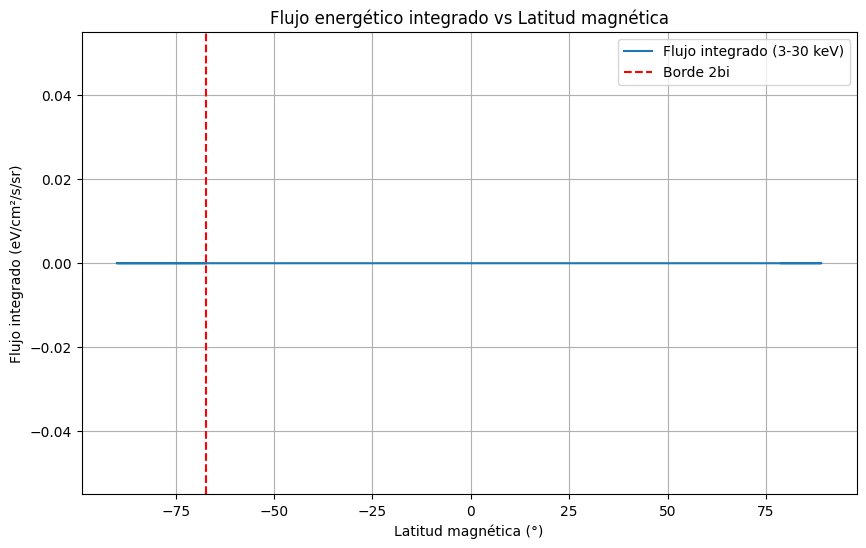

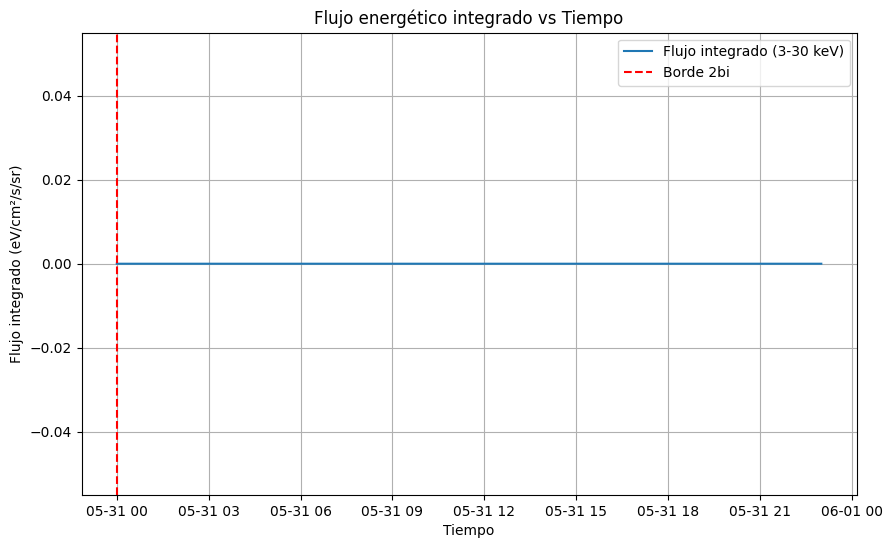

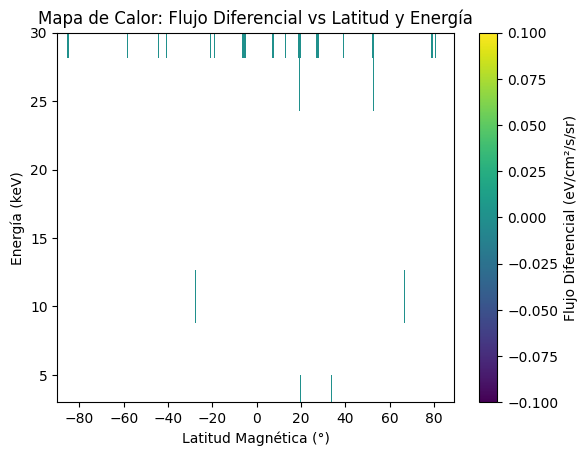

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import cdflib

def load_cdf_data(cdf_file_path):
    try:
        cdf = cdflib.CDF(cdf_file_path)
        ion_flux = cdf.varget("ION_DIFF_ENERGY_FLUX")
        print(ion_flux)
        ion_flux = np.where(ion_flux <= 13, ion_flux, np.nan)  # Replace values > 13 with NaN
        channel_energies = cdf.varget("CHANNEL_ENERGIES") / 1000
        mag_lat = cdf.varget("SC_AACGM_LAT")
        time = cdf.varget("Epoch")
        time_final = cdflib.cdfepoch.to_datetime(time)
        return ion_flux, channel_energies, mag_lat, time_final
    except Exception as e:
        print(f"Error loading CDF data: {e}")
        raise

def filter_energies(channel_energies, energy_min=3, energy_max=30):
    energy_indices = np.where((channel_energies >= energy_min) & (channel_energies <= energy_max))[0]
    if len(energy_indices) == 0:
        raise ValueError("No se encontraron energías en el rango 3-30 keV.")
    return energy_indices

def calculate_integrated_flux(ion_flux, channel_energies, energy_indices):
    ion_flux = np.nan_to_num(ion_flux)  # Replace nan with 0
    delta_E = np.diff(channel_energies, append=channel_energies[-1])[energy_indices]
    integrated_flux = np.sum(ion_flux[:, energy_indices] * delta_E, axis=1)
    return integrated_flux

def find_max_flux(integrated_flux, mag_lat, time_final):
    max_flux_index = np.argmax(integrated_flux)
    max_flux = integrated_flux[max_flux_index]
    max_lat = mag_lat[max_flux_index]
    max_time = time_final[max_flux_index]
    return max_flux_index, max_flux, max_lat, max_time

def plot_flux_vs_latitude(mag_lat, integrated_flux, max_lat):
    plt.figure(figsize=(10, 6))
    plt.plot(mag_lat, integrated_flux, label="Flujo integrado (3-30 keV)")
    plt.axvline(max_lat, color='r', linestyle='--', label="Borde 2bi")
    plt.xlabel("Latitud magnética (°)")
    plt.ylabel("Flujo integrado (eV/cm²/s/sr)")
    plt.title("Flujo energético integrado vs Latitud magnética")
    plt.legend()
    plt.grid()
    plt.show()

def plot_flux_vs_time(time_final, integrated_flux, max_time):
    plt.figure(figsize=(10, 6))
    plt.plot(time_final, integrated_flux, label="Flujo integrado (3-30 keV)")
    plt.axvline(max_time, color='r', linestyle='--', label="Borde 2bi")
    plt.xlabel("Tiempo")
    plt.ylabel("Flujo integrado (eV/cm²/s/sr)")
    plt.title("Flujo energético integrado vs Tiempo")
    plt.legend()
    plt.grid()
    plt.show()

def plot_heatmap(ion_flux, energy_indices, mag_lat, energy_min, energy_max):
    plt.imshow(ion_flux[:, energy_indices].T, aspect='auto', cmap='viridis', extent=[min(mag_lat), max(mag_lat), energy_min, energy_max])
    plt.colorbar(label='Flujo Diferencial (eV/cm²/s/sr)')
    plt.xlabel('Latitud Magnética (°)')
    plt.ylabel('Energía (keV)')
    plt.title('Mapa de Calor: Flujo Diferencial vs Latitud y Energía')
    plt.show()

def main():
    cdf_file_path = "dmsp-f16_ssjs_precipitating-electrons-ions_20130531000000_20130531230000_cdaweb.cdf"
    try:
        ion_flux, channel_energies, mag_lat, time_final = load_cdf_data(cdf_file_path)
        
        # Debugging statements
        print("Ion flux shape:", ion_flux.shape)
        print("Channel energies:", channel_energies)
        print("Magnetic latitude shape:", mag_lat.shape)
        print("Time shape:", time_final.shape)
        
        energy_indices = filter_energies(channel_energies)
        
        # Debugging statements
        print("Energy indices:", energy_indices)
        
        integrated_flux = calculate_integrated_flux(ion_flux, channel_energies, energy_indices)
        
        # Debugging statements
        print("Integrated flux:", integrated_flux)
        
        max_flux_index, max_flux, max_lat, max_time = find_max_flux(integrated_flux, mag_lat, time_final)
        
        print(f"Índice del flujo máximo: {max_flux_index}")
        print(f"Flujo máximo: {max_flux}")
        print(f"Latitud magnética correspondiente: {max_lat}")
        print(f"Tiempo correspondiente: {max_time}")
        
        plot_flux_vs_latitude(mag_lat, integrated_flux, max_lat)
        plot_flux_vs_time(time_final, integrated_flux, max_time)
        plot_heatmap(ion_flux, energy_indices, mag_lat, 3, 30)
    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == "__main__":
    main()